<style>
.eclat-box {
   background: linear-gradient(120deg, #6a11cb 0%, #2575fc 100%);
   color: #fff;
   border-radius: 12px;
   padding: 28px 32px;
   margin-bottom: 24px;
   box-shadow: 0 6px 24px rgba(40,40,80,0.10);
   font-family: 'Segoe UI', 'Arial', sans-serif;
}
.eclat-table {
   width: 80%;
   border-collapse: collapse;
   margin: 18px 0;
   font-size: 1.05em;
   background: rgba(255,255,255,0.07);
   border-radius: 8px;
   overflow: hidden;
}
.eclat-table th, .eclat-table td {
   padding: 10px 16px;
   text-align: left;
}
.eclat-table th {
   background: rgba(255,255,255,0.18);
   color: #ffe082;
   font-weight: bold;
}
.eclat-table tr:nth-child(even) {
   background: rgba(255,255,255,0.10);
}
.eclat-highlight {
   color: #ffe082;
   font-weight: bold;
}
.eclat-section-title {
   color: #ffe082;
   font-size: 1.3em;
   font-weight: bold;
   margin-top: 18px;
}
</style>

<div class="eclat-box">

## ECLAT Algorithm: Quick Overview

**ECLAT (Equivalence Class Clustering and bottom-up Lattice Traversal)** is a fast algorithm for finding frequent itemsets in transaction data (e.g., market basket analysis).

---

<span class="eclat-section-title">How ECLAT Works (Step-by-Step)</span>

<table class="eclat-table">
<thead>
<tr>
<th>Step</th>
<th>Description</th>
<th>Example</th>
</tr>
</thead>
<tbody>
<tr>
<td>1</td>
<td><span class="eclat-highlight">Vertical Format:</span> For each item, store the set of transaction IDs (TIDs) where it appears.</td>
<td>Bread → {T1, T2, T4}<br>Milk → {T1, T3, T4}<br>Eggs → {T2, T3}</td>
</tr>
<tr>
<td>2</td>
<td><span class="eclat-highlight">Find Frequent 1-Itemsets:</span> Keep items with support ≥ min threshold.</td>
<td>If min support = 2:<br>Bread (3), Milk (3), Eggs (2)</td>
</tr>
<tr>
<td>3</td>
<td><span class="eclat-highlight">Combine Items (Set Intersection):</span> For each pair, intersect TID sets to find support.</td>
<tr>sp<td>3</td>la<td><span class="eclat-highlight">Combine Items (Set Intersection):</span> For each pair, intersect TID sets to find support.</td>highlight">Combine Items (Set Intersection):</span> For each pair, intersect TID sets to find support.</td>
<td>Bread ∩ Milk → {T1, T4} (support=2)<br>Bread ∩ Eggs → {T2} (support=1)</td>
</tr>
<tr>
<td>4</td>
<td><span class="eclat-highlight">Repeat for Larger Itemsets:</span> Continue combining frequent itemsets until no more meet support.</td>
<td>(Bread, Milk, Eggs) → ...</td>
</tr>
</tbody>
</table>

---

<span class="eclat-section-title">Pros & Cons</span>

- <span class="eclat-highlight">Pros:</span> Fast for large/dense data, efficient set operations.
- <span class="eclat-highlight">Cons:</span> High memory usage for very large datasets.

---

<span class="eclat-section-title">Applications</span>

- Market basket analysis
- Product recommendations
- Customer behavior insights

---

**Summary:**  
ECLAT uses set intersections on transaction IDs to efficiently find frequent itemsets, making it faster than Apriori for many real-world datasets.

</div>


#
<div style="background: linear-gradient(135deg, rgb(103, 23, 103), rgb(70, 114, 202)); padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(109, 42, 42, 0.1); color: white;">
   <h2 style="font-weight: bold;"> Now Lets Apply ECLAT Algorithm on our dataset with step-by-step explanation </h2>
</div>

In [19]:
#import libbraires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
from itertools import combinations
import pandas as pd

In [20]:
#load the dataset
df=pd.read_csv("Groceries_dataset.csv")

In [21]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


## **1.Groups the DataFrame `df` by customer (`Member_number`) and `Date` to get lists of items purchased together.**  
    Converts these groups into a list of transactions (each transaction is a list of items).
**Example:**  
- Transaction 1: `['sausage', 'whole milk', 'semi-finished bread', 'yogurt']`  
- Transaction 2: `['whole milk', 'pastry', 'salty snack']`  
- Transaction 3: `['canned beer', 'misc. beverages']`

In [22]:
# 1. Group transactions: Each transaction is a set of items bought by a customer on a specific date
transactions = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).tolist()

## **2. Creates a dictionary where each key is an item and the value is a set of transaction IDs (tid) where that item appears.**  
This is called the **vertical format**:  
`item → transactions`  
Instead of the original **horizontal format**:  
`transaction → items`

In [23]:
# 2. Build vertical data format: item -> set of transaction indices

vertical_data = defaultdict(set)
for tid, items in enumerate(transactions):
    for item in items:
        vertical_data[item].add(tid)

## **3. Set `min_support` to 0.1% (0.001) of all transactions**  
- Calculates the minimum number of transactions an itemset must appear in to be considered frequent.

In [24]:
# 3. Set minimum support threshold (e.g., 1% of transactions)
min_support = 0.001
min_count = int(min_support * len(transactions))

## **4. Filter Frequent Items**  
- Keep only items that appear in at least `min_count` transactions  
- Store these frequent items in a dictionary with their transaction IDs  
- Items are stored as tuples (e.g., `('milk',)`) for consistency with larger itemsets

In [25]:
# 4. Find frequent 1-itemsets
frequent_itemsets = dict()
frequent_1_itemsets = {item: tids for item, tids in vertical_data.items() if len(tids) >= min_count}
frequent_itemsets.update({(item,): tids for item, tids in frequent_1_itemsets.items()})

## **5. Find Frequent 2-Itemsets**

- Take all pairs of frequent single items  
- For each pair, find the intersection of their transaction IDs (i.e., transactions where both items appear)  
- If this intersection meets the minimum support count, keep the pair as a frequent itemset

In [26]:
# 5. Generate frequent 2-itemsets using intersection

frequent_2_itemsets = dict()
items = list(frequent_1_itemsets.items())
for i in range(len(items)):
    for j in range(i + 1, len(items)):
        itemset = (items[i][0], items[j][0])
        common_tids = items[i][1] & items[j][1]
        if len(common_tids) >= min_count:
            frequent_2_itemsets[itemset] = common_tids

frequent_itemsets.update(frequent_2_itemsets)

## **6. Convert frequent itemsets to a DataFrame, calculate support, and sort results**

- Convert the frequent itemsets into a pandas DataFrame.
- Calculate support as a percentage:  
    *(number of transactions containing the itemset) / (total transactions)*
- Sort the results by support in descending order.

In [27]:
# 6. Prepare results as a DataFrame

eclat_results = pd.DataFrame([
    {"Itemset": itemset, "Support": len(tids)/len(transactions)}
    for itemset, tids in frequent_itemsets.items()
])
eclat_results.sort_values(by="Support", ascending=False, inplace=True)

# 7. Show the results
eclat_results

,Itemset,Support
1,"(whole milk,)",0.157923
18,"(other vegetables,)",0.122101
13,"(rolls/buns,)",0.110005
9,"(soda,)",0.097106
3,"(yogurt,)",0.085879
...,...,...
441,"(soda, waffles)",0.000936
762,"(chicken, newspapers)",0.000936
758,"(bottled water, cream cheese )",0.000936
768,"(bottled beer, UHT-milk)",0.000936


# **RESULTS**
- **Itemset**: The combination of items (single items or pairs)  
- **Support**: The percentage of transactions containing that itemset

| #   | Itemset                  | Support    | Description                                      |
|-----|--------------------------|------------|--------------------------------------------------|
| 1   | (`whole milk`,)          | 0.1579     | Whole milk appears in ~15.8% of transactions     |
| 18  | (`other vegetables`,)    | 0.1221     | Other vegetables in ~12.2% of transactions       |
| 441 | (`soda`, `waffles`)      | 0.0009     | Soda and waffles appear together in ~0.09%       |

**Key Points to Remember**

- **Vertical Format:** The algorithm tracks which transactions contain each item, rather than listing items in each transaction.
- **Support Calculation:** Using intersections of transaction IDs makes support counting efficient.
- **Bottom-Up Approach:** Finds frequent single items first, then builds larger itemsets from them.
- **Simplified Version:** This implementation only finds 1-itemsets and 2-itemsets. A full ECLAT would find larger itemsets recursively.
- **Efficiency:** ECLAT is efficient for datasets where the vertical format fits in memory, as it avoids repeated scans of the original data.


# **Now the probability that customers will buy two products together**

In [28]:
from collections import defaultdict
import pandas as pd

# 1. Prepare transaction data (same as before)
transactions = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).tolist()

# 2. Build vertical data format
vertical_data = defaultdict(set)
for tid, items in enumerate(transactions):
    for item in items:
        vertical_data[item].add(tid)

# 3. Set minimum support threshold
min_support = 0.001
min_count = int(min_support * len(transactions))

# 4. Find frequent 1-itemsets
frequent_items = {item: tids for item, tids in vertical_data.items() if len(tids) >= min_count}

# 5. Calculate conditional probabilities for all pairs
conditional_probs = []

# Get all possible item pairs
items = list(frequent_items.keys())
for i in range(len(items)):
    item_A = items[i]
    tids_A = frequent_items[item_A]
    support_A = len(tids_A)
    
    for j in range(i+1, len(items)):
        item_B = items[j]
        tids_B = frequent_items[item_B]
        
        # Transactions containing both A and B
        tids_both = tids_A & tids_B
        support_both = len(tids_both)
        
        if support_both >= min_count:
            # P(B|A) = support(A ∪ B) / support(A)
            prob_B_given_A = support_both / support_A
            
            # P(A|B) = support(A ∪ B) / support(B)
            prob_A_given_B = support_both / len(tids_B)
            
            conditional_probs.append({
                'Item_A': item_A,
                'Item_B': item_B,
                'Support_A': support_A/len(transactions),
                'Support_B': len(tids_B)/len(transactions),
                'Support_Both': support_both/len(transactions),
                'P(B|A)': prob_B_given_A,
                'P(A|B)': prob_A_given_B
            })

# 6. Create DataFrame and sort by highest conditional probability
result_df = pd.DataFrame(conditional_probs)
result_df.sort_values(by='P(B|A)', ascending=False, inplace=True)

# 7. Show the results
result_df

,Item_A,Item_B,Support_A,Support_B,Support_Both,P(B|A),P(A|B)
0,sausage,whole milk,0.060349,0.157923,0.008955,0.148394,0.056708
299,frankfurter,other vegetables,0.037760,0.122101,0.005146,0.136283,0.042146
205,salty snack,other vegetables,0.018780,0.122101,0.002205,0.117438,0.018062
428,frozen vegetables,other vegetables,0.028002,0.122101,0.003141,0.112172,0.025725
404,white bread,other vegetables,0.023993,0.122101,0.002606,0.108635,0.021346
...,...,...,...,...,...,...,...
79,whole milk,canned fish,0.157923,0.007686,0.000936,0.005925,0.121739
112,whole milk,frozen dessert,0.157923,0.006148,0.000936,0.005925,0.152174
111,whole milk,canned vegetables,0.157923,0.005480,0.000936,0.005925,0.170732
110,whole milk,spread cheese,0.157923,0.006683,0.000936,0.005925,0.140000


# Interpreting the Conditional Probability Results

This output shows the probability that customers will buy two products together. Let me explain.

## Understanding the Columns

1. **Item_A**: The first product in the pair
2. **Item_B**: The second product in the pair  
3. **Support_A**: How often Item_A appears in all transactions (as percentage)
4. **Support_B**: How often Item_B appears in all transactions (as percentage)
5. **Support_Both**: How often both items appear together in the same transaction
6. **P(B|A)**: Probability of buying Item_B **given** that Item_A was bought
7. **P(A|B)**: Probability of buying Item_A **given** that Item_B was bought

## Key Insights from the Data

### Strong Product Associations (Top of List)
```
sausage + whole milk:
- P(B|A) = 14.8% (If sausage is bought, 14.8% chance whole milk is also bought)
- P(A|B) = 5.7% (If whole milk is bought, 5.7% chance sausage is also bought)
```

```
frankfurter + other vegetables:
- P(B|A) = 13.6% (If frankfurter is bought, 13.6% chance other vegetables are also bought)
- P(A|B) = 4.2% (If other vegetables are bought, 4.2% chance frankfurter is also bought)
```

### Weaker Associations (Bottom of List)
```
whole milk + canned fish:
- P(B|A) = 0.6% (Very low chance of buying canned fish if buying whole milk)
- P(A|B) = 12.2% (But if buying canned fish, 12.2% chance also buying whole milk)
```

## Business Applications

1. **Product Placement**: Pair items with high P(B|A) together in stores (like sausage near whole milk)
2. **Promotions**: Bundle items where P(B|A) is high (buy sausage, get milk discount)
3. **Inventory Management**: Stock more vegetables when frankfurters are on sale
4. **Marketing**: Target customers who bought Item_A with ads for Item_B

## Important Notes

1. **Direction Matters**: P(B|A) ≠ P(A|B) in most cases
2. **High Support ≠ High Probability**: Whole milk appears often (15.8%) but doesn't strongly predict other items
3. **Minimum Support Threshold**: Rare combinations (bottom rows) may not be statistically significant


# **Visualizing Product Association Relationships**

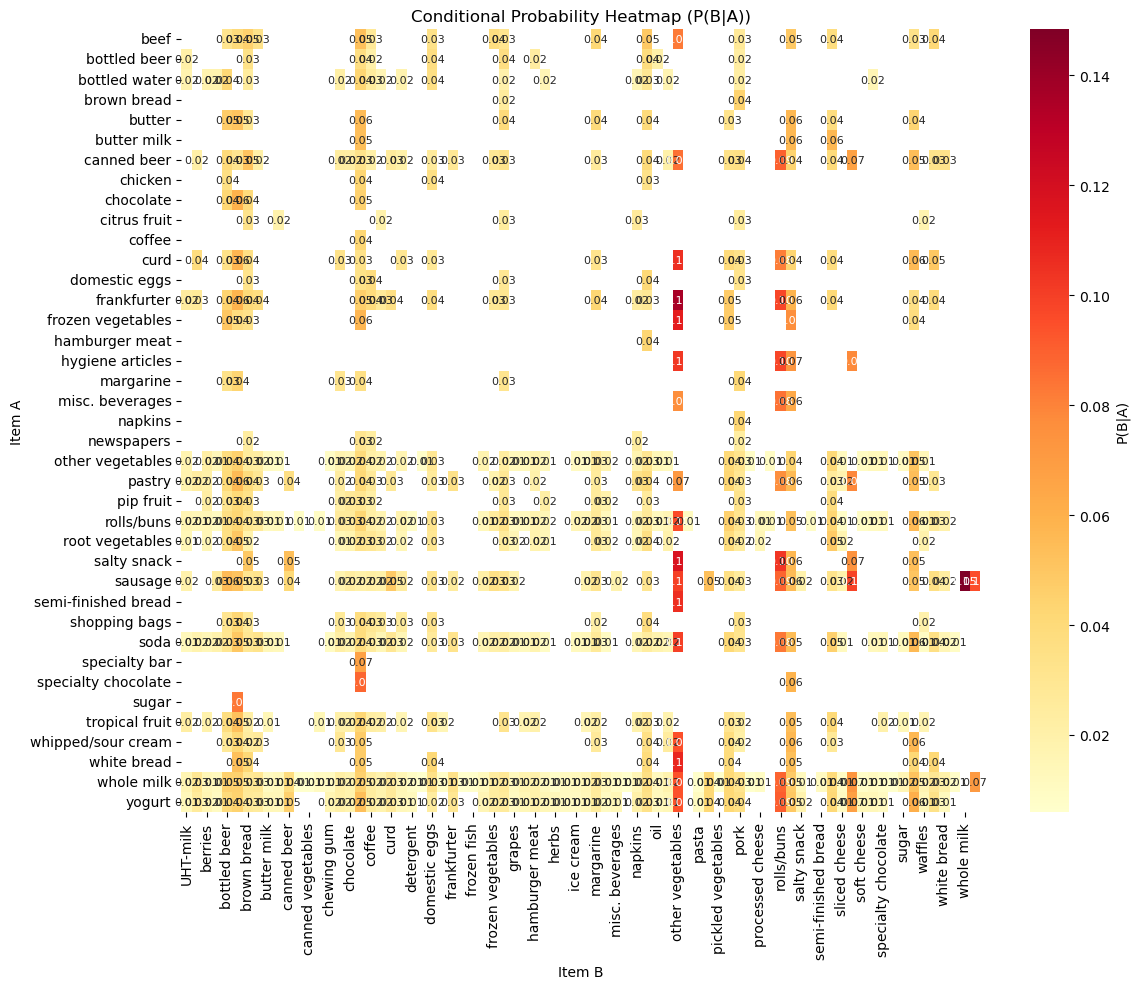

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table for the heatmap
heatmap_data = result_df.pivot(index="Item_A", columns="Item_B", values="P(B|A)")

plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, cmap="YlOrRd", annot=True, fmt=".2f", 
            annot_kws={"size": 8}, cbar_kws={'label': 'P(B|A)'})
plt.title("Conditional Probability Heatmap (P(B|A))")
plt.xlabel("Item B")
plt.ylabel("Item A")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

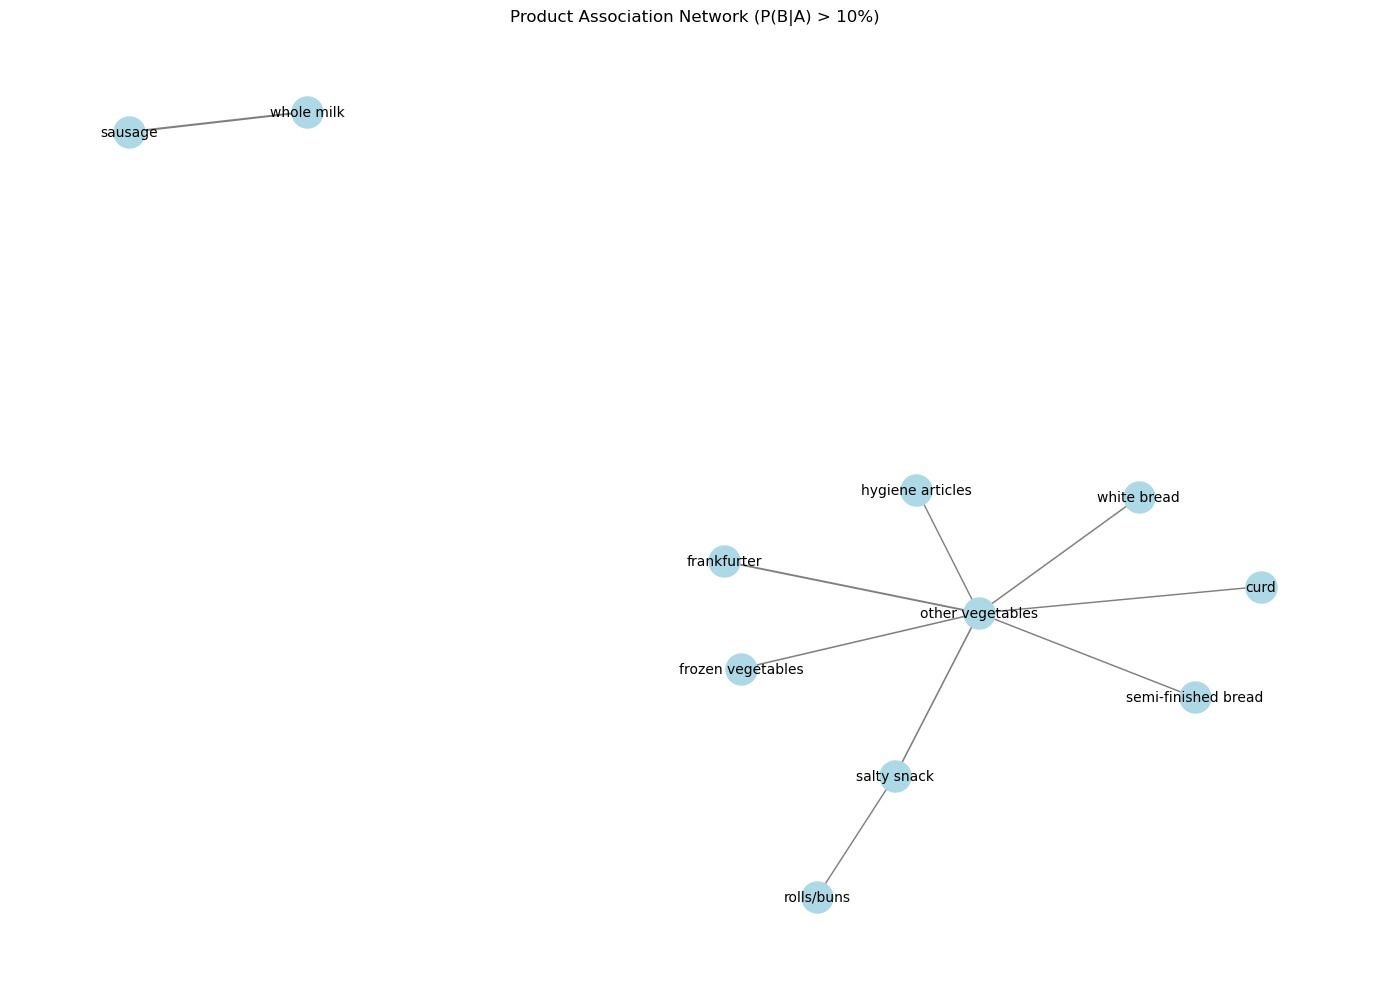

In [30]:
import networkx as nx

# Filter for stronger relationships (P(B|A) > 0.1)
strong_relations = result_df[result_df['P(B|A)'] > 0.1]

# Create graph
G = nx.from_pandas_edgelist(strong_relations, 
                           source='Item_A', 
                           target='Item_B', 
                           edge_attr='P(B|A)')

plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, k=0.5)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')

# Draw edges with width proportional to P(B|A)
edge_width = [d['P(B|A)']*10 for (u, v, d) in G.edges(data=True)]
nx.draw_networkx_edges(G, pos, width=edge_width, alpha=0.5)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=10)

plt.title("Product Association Network (P(B|A) > 10%)")
plt.axis('off')
plt.tight_layout()
plt.show()

In [31]:
import plotly.express as px

# Prepare data for top N associations
top_n = 20
plot_data = result_df.sort_values('P(B|A)', ascending=False).head(top_n)

fig = px.parallel_categories(
    plot_data,
    dimensions=['Item_A', 'Item_B'],
    color='P(B|A)',
    color_continuous_scale=px.colors.sequential.Inferno,
    title=f"Top {top_n} Product Associations"
)

fig.update_layout(margin=dict(l=100, r=100, t=100, b=100))
fig.show()

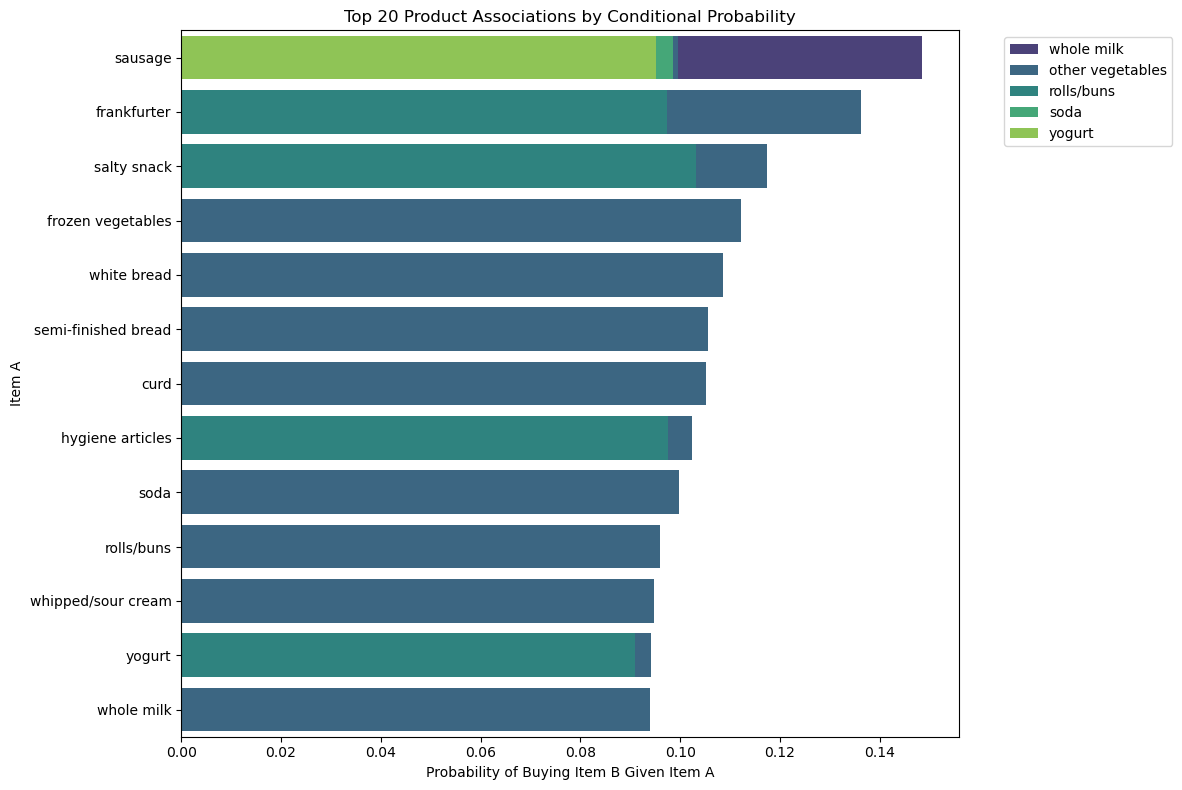

In [32]:
# Get top 20 associations
top_associations = result_df.sort_values('P(B|A)', ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(data=top_associations, x='P(B|A)', y='Item_A', hue='Item_B', 
            dodge=False, palette='viridis')
plt.title("Top 20 Product Associations by Conditional Probability")
plt.xlabel("Probability of Buying Item B Given Item A")
plt.ylabel("Item A")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<div style="background: linear-gradient(120deg, #232526 0%, #414345 100%); border-radius: 12px; padding: 28px 32px; color: #fff; box-shadow: 0 6px 24px rgba(40,40,80,0.10); font-family: 'Segoe UI', 'Arial', sans-serif; margin-bottom: 24px;">

<span style="font-size:1.3em; color:#ffe082; font-weight:bold;">Visualizations</span>

<ol style="margin-top: 18px;">
    <li><b style="color:#ffe082;">Heatmap:</b> Shows all pairwise relationships – look for <span style="color:#ffd54f;">bright squares</span> indicating strong associations.</li>
    <li><b style="color:#ffe082;">Network Graph:</b> Reveals <span style="color:#ffd54f;">clusters</span> of products that are often bought together.</li>
    <li><b style="color:#ffe082;">Parallel Categories:</b> Clearly shows the <span style="color:#ffd54f;">"if A then B"</span> relationships.</li>
    <li><b style="color:#ffe082;">Bar Chart:</b> Highlights the <span style="color:#ffd54f;">absolute strongest</span> relationships.</li>
</ol>

<div style="margin-top: 18px;">
    <span style="font-size:1.1em; color:#ffe082; font-weight:bold;">For best results:</span>
    <ul>
        <li>Filter data to show only <b style="color:#ffd54f;">meaningful associations</b> (e.g., <code>P(B|A) &gt; 5%</code>).</li>
        <li>Focus on products with <b style="color:#ffd54f;">decent individual support</b> (e.g., <code>Support_A &gt; 1%</code>).</li>
        <li>Consider both <code>P(B|A)</code> <b>and</b> <code>P(A|B)</code> when making business decisions.</li>
    </ul>
</div>

</div>